# **The Sparks Foundation**

## Ayush Kumar
### (Data Science & Business Analytics Intern)

### **GRIP Task #2 - Prediction using Unsupervised ML**
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
import warnings
warnings.simplefilter('ignore')

## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the dataset

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Let's scale our data first using scikit-learn -

In [4]:
from sklearn.preprocessing import scale
scaled_data = scale(df)

We will use **The Elbow Method** to predict the optimum no. of clusters -

In [5]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 6):
    km = KMeans(n_clusters=i)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

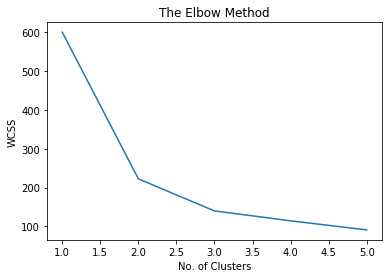

In [6]:
plt.plot(range(1, 6), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimum no. of clusters in the above plot is where the elbow occurs i.e. when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

## K-Means Clustering

In [7]:
kmc = KMeans(n_clusters=3)
y_kmeans = kmc.fit_predict(scaled_data)

We can also check the mean **silhouette coefficient** of all samples -

In [8]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(scaled_data, kmc.labels_)
print(silhouette)

0.45994823920518635


**Visualizing the clusters -**

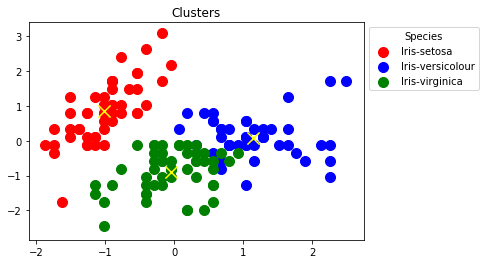

In [9]:
plt.scatter(scaled_data[y_kmeans == 0, 0], scaled_data[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(scaled_data[y_kmeans == 1, 0], scaled_data[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(scaled_data[y_kmeans == 2, 0], scaled_data[y_kmeans == 2, 1], 
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmc.cluster_centers_[:, 0], kmc.cluster_centers_[:, 1], 
            marker='x', s = 150, c='yellow')
plt.title('Clusters')
plt.legend(loc='best', title='Species', frameon=True, bbox_to_anchor=(1, 1))
plt.show()